# Blog Comments Count Prediction
#### 2024.6.24

### Purpose of Data Analysis
Analyze posts with positive consumer feedback.
Predict posts that will receive good consumer reactions in advance to enhance the competitiveness of the portal site.

### Key Points
Analysis and statistical testing of continuous and categorical data.
Approaches to EDA (Exploratory Data Analysis) when dealing with a large number of data columns.
Methods to handle target label distribution when training regression models (considering outlier labels).

In [2]:
# library for feature engineering and EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 

from IPython.display import Image

# library for statistic and EDA
from scipy import stats
from scipy.stats import kruskal

# library for machine learning
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 1. Data Processing 1

### 1-1 Data Load

In [3]:
random_state = 1234
df_train_comment = pd.read_csv('./data/2.Blog_comment/df_train_comment.csv')
df_train_comment.head()

,blog_id,total_comment_before_basetime_page,24h_comment_before_basetime_page,difference_total_24h_comment_page,24h_comment_after_blogpost_page,difference_24h_comment_between_basetime_blogpost_page,avg(total_comment_before_basetime_blog),std(total_comment_before_basetime_blog),min(total_comment_before_basetime_blog),max(total_comment_before_basetime_blog),...,avg(24h_comment_after_blogpost_blog),std(24h_comment_after_blogpost_blog),min(24h_comment_after_blogpost_blog),max(24h_comment_after_blogpost_blog),median(24h_comment_after_blogpost_blog),avg(difference_24h_comment_between_basetime_blogpost_blog),std(difference_24h_comment_between_basetime_blogpost_blog),min(difference_24h_comment_between_basetime_blogpost_blog),max(difference_24h_comment_between_basetime_blogpost_blog),median(difference_24h_comment_between_basetime_blogpost_blog)
0,7638683741439,2.0,2.0,0.0,2.0,2.0,40.30467,53.845657,0.0,401.0,...,34.567566,48.475178,0.0,378.0,12.0,1.479934,46.18691,-356.0,377.0,0.0
1,155122932624,6.0,2.0,4.0,5.0,-2.0,40.30467,53.845657,0.0,401.0,...,34.567566,48.475178,0.0,378.0,12.0,1.479934,46.18691,-356.0,377.0,0.0
2,3017770344577,6.0,2.0,4.0,5.0,-2.0,40.30467,53.845657,0.0,401.0,...,34.567566,48.475178,0.0,378.0,12.0,1.479934,46.18691,-356.0,377.0,0.0
3,8531508743621,2.0,2.0,0.0,2.0,2.0,40.30467,53.845657,0.0,401.0,...,34.567566,48.475178,0.0,378.0,12.0,1.479934,46.18691,-356.0,377.0,0.0
4,359127110474,3.0,1.0,2.0,2.0,-1.0,40.30467,53.845657,0.0,401.0,...,34.567566,48.475178,0.0,378.0,12.0,1.479934,46.18691,-356.0,377.0,0.0


In [4]:
# Load Train Data Set
df_train_link = pd.read_csv("./data/2.Blog_comment/df_train_link.csv")
df_train_blog_content = pd.read_csv("./data/2.Blog_comment/df_train_blog_content.csv")
df_train_blog_date = pd.read_csv("./data/2.Blog_comment/df_train_blog_date.csv")
df_train_blog_parent = pd.read_csv("./data/2.Blog_comment/df_train_blog_parent.csv")
df_train_blog_target = pd.read_csv("./data/2.Blog_comment/df_train_blog_target.csv")

In [5]:
df_train_blog_target.head(5)

,blog_id,target
0,7638683741439,1.0
1,155122932624,0.0
2,3017770344577,0.0
3,8531508743621,1.0
4,359127110474,27.0


In [6]:
# Load Test Data Set
df_test_comment = pd.read_csv("./data/2.Blog_comment/df_test_comment.csv")
df_test_link = pd.read_csv("./data/2.Blog_comment/df_test_link.csv")
df_test_blog_content = pd.read_csv("./data/2.Blog_comment/df_test_blog_content.csv")
df_test_blog_date = pd.read_csv("./data/2.Blog_comment/df_test_blog_date.csv")
df_test_blog_parent = pd.read_csv("./data/2.Blog_comment/df_test_blog_parent.csv")
df_test_blog_target = pd.read_csv("./data/2.Blog_comment/df_test_blog_target.csv")

In [7]:
df_train_blog_parent.head()

,blog_id,parent_blog,min(comment_on_parent_blog),max(comment_on_parent_blog),avg(comment_on_parent_blog)
0,7638683741439,0.0,NaN,0.0,0.0
1,155122932624,0.0,0.0,0.0,0.0
2,3017770344577,0.0,0.0,0.0,0.0
3,8531508743621,0.0,0.0,0.0,0.0
4,359127110474,0.0,NaN,0.0,0.0


In [8]:
df_train_blog_parent.parent_blog.unique()

array([  0.,   1.,   2.,   3.,   5.,   7.,   4.,   6.,   9., 136., 101.,
        35.,  32.,  13.,  12.,   8.,  21.,  20.,  11.,  10.,  15.,  14.])

In [9]:
df_test_blog_parent.head()

,blog_id,parent_blog,min(comment_on_parent_blog),max(comment_on_parent_blog),avg(comment_on_parent_blog)
0,5610306109,0.0,0.0,0.0,0.0
1,1984909392749,0.0,0.0,0.0,0.0
2,117839817913,0.0,0.0,0.0,0.0
3,1453294624507,0.0,0.0,0.0,0.0
4,1357160498521,0.0,0.0,0.0,0.0


In [10]:
df_train_link.describe()

,blog_id,total_link_before_basetime_page,24h_link_before_basetime_page,24h_link_after_blogpost_page,avg(total_link_before_basetime_blog),std(total_link_before_basetime_blog),min(total_link_before_basetime_blog),max(total_link_before_basetime_blog),median(total_link_before_basetime_blog),avg(24h_link_before_basetime_blog),...,avg(24h_link_after_blogpost_blog),std(24h_link_after_blogpost_blog),min(24h_link_after_blogpost_blog),max(24h_link_after_blogpost_blog),median(24h_link_after_blogpost_blog),avg(difference_24h_link_between_basetime_blogpost_blog),std(difference_24h_link_between_basetime_blogpost_blog),min(difference_24h_link_between_basetime_blogpost_blog),max(difference_24h_link_between_basetime_blogpost_blog),median(difference_24h_link_between_basetime_blogpost_blog)
count,5.239700e+04,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,...,52397.000000,52273.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000
mean,3.670163e+12,0.501345,0.191614,0.457183,0.501345,0.778465,0.002195,5.537531,0.279176,0.191614,...,0.457183,0.725900,0.002195,5.033895,0.171250,0.011718,0.685857,-3.926923,4.281505,0.000286
std,3.186612e+12,1.562923,0.877402,1.472210,0.960882,0.955727,0.075003,6.989038,0.861055,0.359482,...,0.899341,0.911791,0.075003,6.503113,0.685764,0.022452,0.942957,4.533971,5.180441,0.018533
min,4.094774e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.055556,0.000000,-20.000000,0.000000,-0.500000
25%,6.685753e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,0.000000,0.000000
50%,2.943311e+12,0.000000,0.000000,0.000000,0.108696,0.394463,0.000000,2.000000,0.000000,0.043165,...,0.092637,0.371303,0.000000,2.000000,0.000000,0.000000,0.327737,-2.000000,2.000000,0.000000
75%,6.451619e+12,0.000000,0.000000,0.000000,0.498462,1.121571,0.000000,10.000000,0.000000,0.203822,...,0.435897,1.032096,0.000000,9.000000,0.000000,0.014286,0.942809,0.000000,8.000000,0.000000
max,9.999428e+12,30.000000,24.000000,26.000000,8.952662,5.194229,8.000000,30.000000,11.000000,3.153846,...,8.491124,4.957952,8.000000,26.000000,11.000000,0.666667,7.778174,0.000000,23.000000,1.000000


In [12]:
df_train_link.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52397 entries, 0 to 52396
Data columns (total 29 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   blog_id                                                     52397 non-null  int64  
 1   total_link_before_basetime_page                             52397 non-null  float64
 2   24h_link_before_basetime_page                               52397 non-null  float64
 3   24h_link_after_blogpost_page                                52397 non-null  float64
 4   avg(total_link_before_basetime_blog)                        52397 non-null  float64
 5   std(total_link_before_basetime_blog)                        52397 non-null  float64
 6   min(total_link_before_basetime_blog)                        52397 non-null  float64
 7   max(total_link_before_basetime_blog)                        52397 non-null  float64
 

In [13]:
df_train_blog_content.head(3)

,blog_id,word_0,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,...,word_190,word_191,word_192,word_193,word_194,word_195,word_196,word_197,word_198,word_199
0,7638683741439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,155122932624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3017770344577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df_train_blog_content.describe()

,blog_id,word_0,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,...,word_190,word_191,word_192,word_193,word_194,word_195,word_196,word_197,word_198,word_199
count,5.239700e+04,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,...,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000
mean,3.670163e+12,0.001641,0.175697,0.000076,0.000305,0.353780,0.157795,0.241407,0.002424,0.003416,...,0.000191,0.025956,0.014676,0.000248,0.042044,0.002290,0.003435,0.002615,0.008455,0.000305
std,3.186612e+12,0.040480,0.380566,0.008737,0.017472,0.478146,0.364552,0.427941,0.049173,0.058349,...,0.013814,0.159005,0.120255,0.015750,0.200692,0.047802,0.058511,0.051067,0.091561,0.017472
min,4.094774e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.685753e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.943311e+12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.451619e+12,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999428e+12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df_train_blog_date.head(3)

,blog_id,difference_date_between_basetime_blogpost,mon_basetime,tue_basetime,wed_basetime,thur_basetime,fri_basetime,sat_basetime,sun_basetime,mon_blogpost,tue_blogpost,wed_blogpost,thur_blogpost,fri_blogpost,sat_blogpost,sun_blogpost
0,7638683741439,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,155122932624,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3017770344577,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [16]:
df_train_blog_date.describe()

,blog_id,difference_date_between_basetime_blogpost,mon_basetime,tue_basetime,wed_basetime,thur_basetime,fri_basetime,sat_basetime,sun_basetime,mon_blogpost,tue_blogpost,wed_blogpost,thur_blogpost,fri_blogpost,sat_blogpost,sun_blogpost
count,5.239700e+04,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000
mean,3.670163e+12,2850.294864,0.113919,0.115808,0.138100,0.165296,0.167758,0.161650,0.137470,0.159227,0.167681,0.171327,0.162242,0.154455,0.096151,0.088917
std,3.186612e+12,3814.180711,0.317716,0.319998,0.345008,0.371451,0.373655,0.368133,0.344346,0.365891,0.373587,0.376798,0.368676,0.361388,0.294800,0.284627
min,4.094774e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.685753e+11,93.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.943311e+12,1859.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.451619e+12,3959.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999428e+12,57894.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



#### Data Joining Process
- The common key blog_id is used for joining, as it is unique across the datasets.
Perform joins on both train and test datasets individually.
- There are five types of joins:
1. Inner Join: Intersection, uses only the overlapping values from the original and join tables.
2. Left Join: Based on the left table, includes all values from the left table and matched values from the right table (non-matching values will have NA).
3. Right Join: Based on the right table, includes all values from the right table and matched values from the left table (non-matching values will have NA).
4. Full Outer Join: Union, includes all values from both tables.
5. Cross Join: Cartesian product, includes all possible combinations of rows from both tables.

In [17]:
df_train_list = [df_train_link, df_train_blog_parent, df_train_blog_date, df_train_blog_content, df_train_blog_target]

In [18]:
df_train = df_train_comment.copy()
for df_candidate in df_train_list:
    df_train = pd.merge(df_train, df_candidate, on='blog_id')
df_train.head(5)

,blog_id,total_comment_before_basetime_page,24h_comment_before_basetime_page,difference_total_24h_comment_page,24h_comment_after_blogpost_page,difference_24h_comment_between_basetime_blogpost_page,avg(total_comment_before_basetime_blog),std(total_comment_before_basetime_blog),min(total_comment_before_basetime_blog),max(total_comment_before_basetime_blog),...,word_191,word_192,word_193,word_194,word_195,word_196,word_197,word_198,word_199,target
0,7638683741439,2.0,2.0,0.0,2.0,2.0,40.30467,53.845657,0.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,155122932624,6.0,2.0,4.0,5.0,-2.0,40.30467,53.845657,0.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3017770344577,6.0,2.0,4.0,5.0,-2.0,40.30467,53.845657,0.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8531508743621,2.0,2.0,0.0,2.0,2.0,40.30467,53.845657,0.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,359127110474,3.0,1.0,2.0,2.0,-1.0,40.30467,53.845657,0.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0


In [19]:
df_train.head(5)

,blog_id,total_comment_before_basetime_page,24h_comment_before_basetime_page,difference_total_24h_comment_page,24h_comment_after_blogpost_page,difference_24h_comment_between_basetime_blogpost_page,avg(total_comment_before_basetime_blog),std(total_comment_before_basetime_blog),min(total_comment_before_basetime_blog),max(total_comment_before_basetime_blog),...,word_191,word_192,word_193,word_194,word_195,word_196,word_197,word_198,word_199,target
0,7638683741439,2.0,2.0,0.0,2.0,2.0,40.30467,53.845657,0.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,155122932624,6.0,2.0,4.0,5.0,-2.0,40.30467,53.845657,0.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3017770344577,6.0,2.0,4.0,5.0,-2.0,40.30467,53.845657,0.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8531508743621,2.0,2.0,0.0,2.0,2.0,40.30467,53.845657,0.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,359127110474,3.0,1.0,2.0,2.0,-1.0,40.30467,53.845657,0.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0


In [20]:
df_test = df_test_comment.copy()
df_test_list = [df_test_link, df_test_blog_parent, df_test_blog_date, df_test_blog_content, df_test_blog_target]
for df_candidate in df_test_list:
    df_test = pd.merge(df_test, df_candidate, on="blog_id")
df_test.head(5)

,blog_id,total_comment_before_basetime_page,24h_comment_before_basetime_page,difference_total_24h_comment_page,24h_comment_after_blogpost_page,difference_24h_comment_between_basetime_blogpost_page,avg(total_comment_before_basetime_blog),std(total_comment_before_basetime_blog),min(total_comment_before_basetime_blog),max(total_comment_before_basetime_blog),...,word_191,word_192,word_193,word_194,word_195,word_196,word_197,word_198,word_199,target
0,5610306109,35.0,35.0,0.0,35.0,35.0,10.630660,17.882992,1.0,259.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,1984909392749,21.0,0.0,2.0,21.0,-2.0,43.435825,75.590485,0.0,634.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,117839817913,2.0,2.0,0.0,2.0,2.0,1.733333,3.043390,0.0,9.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1453294624507,3.0,3.0,0.0,3.0,3.0,27.230215,45.970950,0.0,371.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4,1357160498521,0.0,0.0,0.0,0.0,0.0,4.500000,6.677075,0.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 1-2 Check Data Duplication

In [21]:
print("Number of duplicate entries in Train Data:", df_train.drop("blog_id", axis=1).duplicated().sum())

Number of duplicate entries in Train Data: 3309


In [22]:
df_train = df_train.drop(["blog_id"], axis=1).drop_duplicates(keep='first')

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49088 entries, 0 to 52396
Columns: 278 entries, total_comment_before_basetime_page to target
dtypes: float64(278)
memory usage: 104.5 MB


In [25]:
# don't forget to reset index
df_train.head()

,total_comment_before_basetime_page,24h_comment_before_basetime_page,difference_total_24h_comment_page,24h_comment_after_blogpost_page,difference_24h_comment_between_basetime_blogpost_page,avg(total_comment_before_basetime_blog),std(total_comment_before_basetime_blog),min(total_comment_before_basetime_blog),max(total_comment_before_basetime_blog),median(total_comment_before_basetime_blog),...,word_191,word_192,word_193,word_194,word_195,word_196,word_197,word_198,word_199,target
0,2.0,2.0,0.0,2.0,2.0,40.30467,53.845657,0.0,401.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6.0,2.0,4.0,5.0,-2.0,40.30467,53.845657,0.0,401.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,2.0,0.0,2.0,2.0,40.30467,53.845657,0.0,401.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.0,1.0,2.0,2.0,-1.0,40.30467,53.845657,0.0,401.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0
5,6.0,0.0,2.0,5.0,-2.0,40.30467,53.845657,0.0,401.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df_train = df_train.reset_index(drop=True).copy()

In [27]:
df_train.head()

,total_comment_before_basetime_page,24h_comment_before_basetime_page,difference_total_24h_comment_page,24h_comment_after_blogpost_page,difference_24h_comment_between_basetime_blogpost_page,avg(total_comment_before_basetime_blog),std(total_comment_before_basetime_blog),min(total_comment_before_basetime_blog),max(total_comment_before_basetime_blog),median(total_comment_before_basetime_blog),...,word_191,word_192,word_193,word_194,word_195,word_196,word_197,word_198,word_199,target
0,2.0,2.0,0.0,2.0,2.0,40.30467,53.845657,0.0,401.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6.0,2.0,4.0,5.0,-2.0,40.30467,53.845657,0.0,401.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,2.0,0.0,2.0,2.0,40.30467,53.845657,0.0,401.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.0,1.0,2.0,2.0,-1.0,40.30467,53.845657,0.0,401.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0
4,6.0,0.0,2.0,5.0,-2.0,40.30467,53.845657,0.0,401.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
print("Number of duplicate entries in Test Data:", df_test.drop("blog_id", axis=1).duplicated().sum())
df_test = df_test.drop(["blog_id"], axis=1).drop_duplicates(keep='first')
df_test = df_test.reset_index().drop(["index"], axis=1).copy()
df_test.info()

Number of duplicate entries in Test Data: 790
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6834 entries, 0 to 6833
Columns: 278 entries, total_comment_before_basetime_page to target
dtypes: float64(278)
memory usage: 14.5 MB


## 2. EDA

### 2-1 Data Type and Summary

In [29]:
df_train.info()
#categorical과 numeric feature type을 heuristic하게 검증 필요

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49088 entries, 0 to 49087
Columns: 278 entries, total_comment_before_basetime_page to target
dtypes: float64(278)
memory usage: 104.1 MB


In [30]:
for column_name in list(df_train.columns):
    print(column_name, df_train[column_name].unique())
# there are some categorical data printed as 0,1 (these are not numerical data)
# also we can find some column that is not needed

total_comment_before_basetime_page [2.000e+00 6.000e+00 3.000e+00 3.000e+01 0.000e+00 5.100e+01 1.000e+01
 3.200e+01 6.400e+01 2.500e+01 3.500e+01 6.500e+01 4.600e+01 4.000e+00
 9.000e+00 3.770e+02 1.000e+00 3.980e+02 4.010e+02 7.000e+00 2.100e+01
 3.300e+01 2.600e+01 3.600e+01 5.200e+01 5.400e+01 1.400e+01 1.800e+01
 1.900e+01 3.700e+01 7.100e+01 7.200e+01 5.000e+00 6.200e+01 1.700e+01
 7.900e+01 5.900e+01 3.100e+01 1.300e+01 1.100e+01 1.600e+01 4.000e+01
 5.300e+01 5.600e+01 1.160e+02 5.700e+01 1.870e+02 5.500e+01 8.100e+01
 8.900e+01 3.900e+01 1.500e+01 4.300e+01 2.200e+01 1.200e+02 1.320e+02
 9.900e+01 1.050e+02 1.090e+02 4.200e+01 4.800e+01 5.000e+01 1.330e+02
 7.500e+01 9.500e+01 1.000e+02 2.900e+01 4.100e+01 1.600e+02 1.610e+02
 1.240e+02 1.220e+02 1.230e+02 1.150e+02 1.200e+01 1.350e+02 1.420e+02
 1.460e+02 8.000e+01 8.000e+00 9.200e+01 9.800e+01 7.300e+01 6.600e+01
 7.700e+01 7.800e+01 1.940e+02 2.030e+02 2.120e+02 1.130e+02 2.700e+01
 2.300e+01 2.400e+01 8.700e+01 3.800e+01 7

In [32]:
# Distinguishing Categorical and Numerical Columns
#Columns with only two unique values (0, 1) are identified as categorical columns.
count = 0
categorical_column_list = []
numeric_column_list = []
for column_name in list(df_train.columns):
    unique_list = df_train[column_name].unique()
    if len(unique_list) == 2: #Columns with only two unique values
        if (1 in unique_list) & (0 in unique_list):
            count = count + 1
            categorical_column_list.append(column_name)
        else:
            numeric_column_list.append(column_name)
    else:
        numeric_column_list.append(column_name)
print("categorical columns : " + str(count))
print(categorical_column_list)

categorical columns : 214
['mon_basetime', 'tue_basetime', 'wed_basetime', 'thur_basetime', 'fri_basetime', 'sat_basetime', 'sun_basetime', 'mon_blogpost', 'tue_blogpost', 'wed_blogpost', 'thur_blogpost', 'fri_blogpost', 'sat_blogpost', 'sun_blogpost', 'word_0', 'word_1', 'word_2', 'word_3', 'word_4', 'word_5', 'word_6', 'word_7', 'word_8', 'word_9', 'word_10', 'word_11', 'word_12', 'word_13', 'word_14', 'word_15', 'word_16', 'word_17', 'word_18', 'word_19', 'word_20', 'word_21', 'word_22', 'word_23', 'word_24', 'word_25', 'word_26', 'word_27', 'word_28', 'word_29', 'word_30', 'word_31', 'word_32', 'word_33', 'word_34', 'word_35', 'word_36', 'word_37', 'word_38', 'word_39', 'word_40', 'word_41', 'word_42', 'word_43', 'word_44', 'word_45', 'word_46', 'word_47', 'word_48', 'word_49', 'word_50', 'word_51', 'word_52', 'word_53', 'word_54', 'word_55', 'word_56', 'word_57', 'word_58', 'word_59', 'word_60', 'word_61', 'word_62', 'word_63', 'word_64', 'word_65', 'word_66', 'word_67', 'word_68'

In [33]:
print("numeric columns : " + str(len(numeric_column_list)))
print(numeric_column_list)

numeric columns : 64
['total_comment_before_basetime_page', '24h_comment_before_basetime_page', 'difference_total_24h_comment_page', '24h_comment_after_blogpost_page', 'difference_24h_comment_between_basetime_blogpost_page', 'avg(total_comment_before_basetime_blog)', 'std(total_comment_before_basetime_blog)', 'min(total_comment_before_basetime_blog)', 'max(total_comment_before_basetime_blog)', 'median(total_comment_before_basetime_blog)', 'avg(24h_comment_before_basetime_blog)', 'std(24h_comment_before_basetime_blog)', 'min(24h_comment_before_basetime_blog)', 'max(24h_comment_before_basetime_blog)', 'median(24h_comment_before_basetime_blog)', 'avg(difference_total_24h_comment_blog)', 'std(difference_total_24h_comment_blog)', 'min(difference_total_24h_comment_blog)', 'max(difference_total_24h_comment_blog)', 'median(difference_total_24h_comment_blog)', 'avg(24h_comment_after_blogpost_blog)', 'std(24h_comment_after_blogpost_blog)', 'min(24h_comment_after_blogpost_blog)', 'max(24h_comment

In [35]:
# isnull()
# isna()
df_train.isna().sum().sort_values(ascending=False)

min(comment_on_parent_blog)           22552
std(24h_link_after_blogpost_blog)       124
total_comment_before_basetime_page        0
word_115                                  0
word_113                                  0
                                      ...  
word_22                                   0
word_23                                   0
word_24                                   0
word_25                                   0
target                                    0
Length: 278, dtype: int64

In [36]:
print(df_train.columns[(df_train.isnull().sum() > 0)])

Index(['std(24h_link_after_blogpost_blog)', 'min(comment_on_parent_blog)'], dtype='object')


##### Summary of Data Set
##### Number of Variables : 291
    numeric variables : 64 (target incl.)
    categorical variables : 214
##### Number of observations(Train) : 49088 (dropped duplicated)
##### Missing Cells : 2 columns
    column 1 : std(24h_link_after_blogpost_blog) 124
    column 2 : min(comment_on_parent_blog)       22552
##### Duplicated Rows : 3309/790 

### 2-2 Dependent Data Explore

In [37]:
df_train["target"].describe()

count    49088.000000
mean         6.969667
std         38.756549
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max       1424.000000
Name: target, dtype: float64

In [38]:
df_train["target"].median()

0.0

{'whiskers': [<matplotlib.lines.Line2D at 0x7fae7114a650>,
 'caps': [<matplotlib.lines.Line2D at 0x7fae7114ab90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fae7114a3b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fae7114b0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fae7114b370>],
 'means': []}

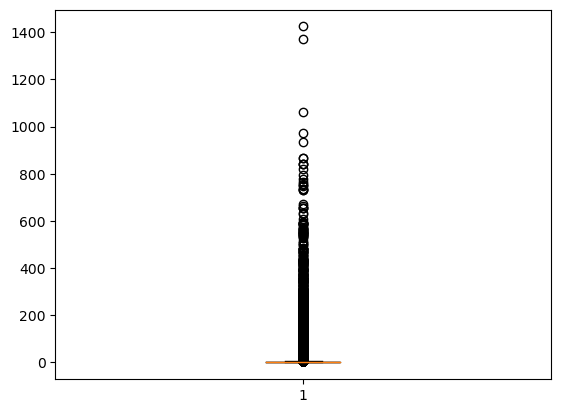

In [39]:
plt.boxplot(df_train["target"])

<Axes: >

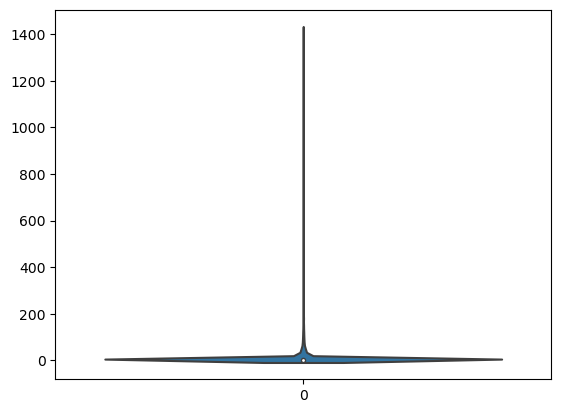

In [42]:
sns.violinplot(df_train["target"])

*   왜도 (skewness)
*   Positive Skew : 오른쪽으로 길게 뻗음
*   Negative Skew : 왼쪽으로 길게 뻗음
*   첨도 (kurtosis)
*   kurtosis == 0 : 정규분포와 유사한 뾰족한 정도
*   kurtosis < 0 : 정규분포보다 낮은 뾰족함
*   kurtosis > 0 : 정규분포보다 뾰족함

In [43]:
print("skew : "+ str(df_train["target"].skew()))
print("kurtosis : "+ str(df_train["target"].kurtosis()))

skew : 12.430651176535642
kurtosis : 221.64692432309462


/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='target', ylabel='Percent'>

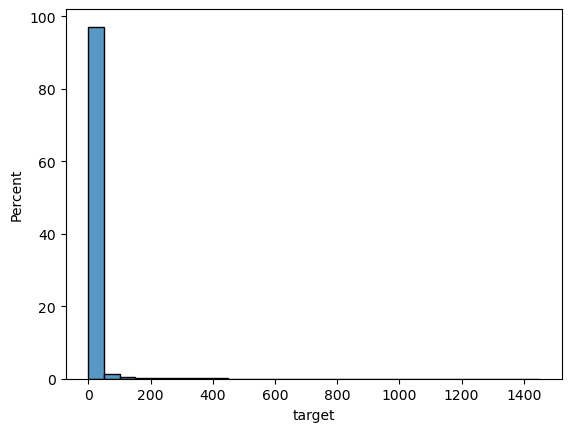

In [48]:
sns.histplot(data=df_train, x="target", binwidth=50, stat="percent")

/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='target', ylabel='Percent'>

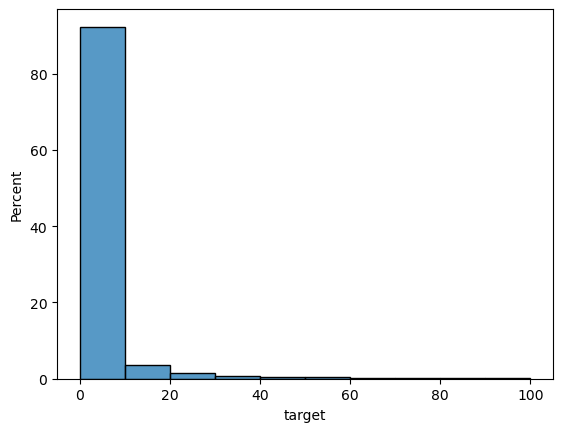

In [49]:
sns.histplot(data=df_train[df_train["target"]<100], x="target", binwidth=10, stat="percent")

/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='target', ylabel='Percent'>

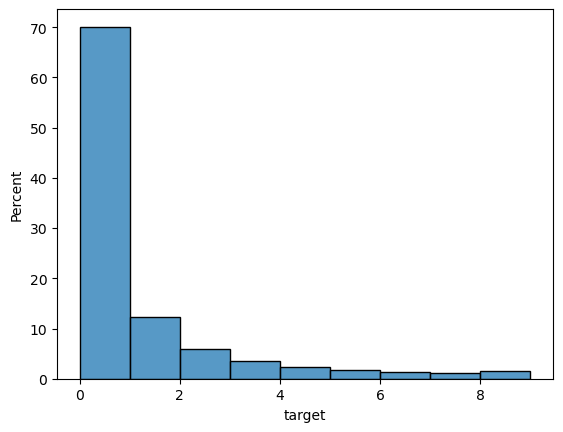

In [50]:
sns.histplot(data=df_train[df_train["target"]<10], x="target", binwidth=1, stat="percent")

In [51]:
count = len(df_train[df_train["target"]<=10])/len(df_train)
print("comments less than or equal to 10 : " + str(round((count)*100,1)) + "%")

# 91.5% 데이터가 10이하인 값으로 target_column에 분포. 이는 모델 학습시 고려되어야 할 수 있음

comments less than or equal to 10 : 91.5%


In [52]:
df_train[df_train["target"]<=10].describe()["target"]

count    44896.000000
mean         0.884221
std          1.878988
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         10.000000
Name: target, dtype: float64

<Axes: xlabel='target'>

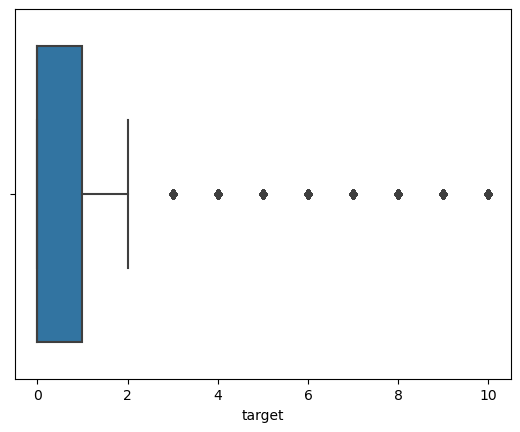

In [53]:
sns.boxplot(data=df_train[df_train["target"]<=10], x="target")

#### Insight
* The target variable has very high skewness and kurtosis.
* Values below 10 constitute 91.5% of the total.
* The skewed target column may need special consideration during model training (over-generalization might lead to poor performance).

### 2-3 Independent Data Explore

### Checking the Distribution of Feature Data
There are too many feature columns. How can we analyze them?

1. Take a high-level view of the data:
- Since detailed exploration is difficult, look at the data from a broader perspective (e.g., using a correlation analysis heatmap or the describe() function).

2. Explore each data point individually:
- Examine the distribution and characteristics of each feature one by one.

3. Perform the first step, then explore a subset of the data:
- After the high-level analysis, select and explore a subset of the data in detail.

In [55]:
df_train.describe().to_csv('./data/check_blog.csv')

#### Delete useless columns

In [58]:
df_train[numeric_column_list].apply(lambda x : x.nunique()).sort_values()
# if output is 1, delete the column

min(difference_total_24h_comment_blog)                      1
min(comment_on_parent_blog)                                 1
min(difference_total_24h_link_blog)                         1
min(24h_link_before_basetime_blog)                          1
median(difference_total_24h_link_blog)                      3
                                                         ... 
24h_comment_before_basetime_page                          579
24h_comment_after_blogpost_page                           677
total_comment_before_basetime_page                        886
difference_24h_comment_between_basetime_blogpost_page    1021
difference_date_between_basetime_blogpost                6442
Length: 64, dtype: int64

In [59]:
df_train = df_train.drop(["min(difference_total_24h_comment_blog)","min(difference_total_24h_link_blog)","min(24h_link_before_basetime_blog)","min(comment_on_parent_blog)"],axis=1)
df_test = df_test.drop(["min(difference_total_24h_comment_blog)","min(difference_total_24h_link_blog)","min(24h_link_before_basetime_blog)","min(comment_on_parent_blog)"],axis=1)

In [60]:
numeric_column_list.remove("min(difference_total_24h_comment_blog)")
numeric_column_list.remove("min(difference_total_24h_link_blog)")
numeric_column_list.remove("min(24h_link_before_basetime_blog)")
numeric_column_list.remove("min(comment_on_parent_blog)")

#### 1) numeric column EDA

<Axes: >

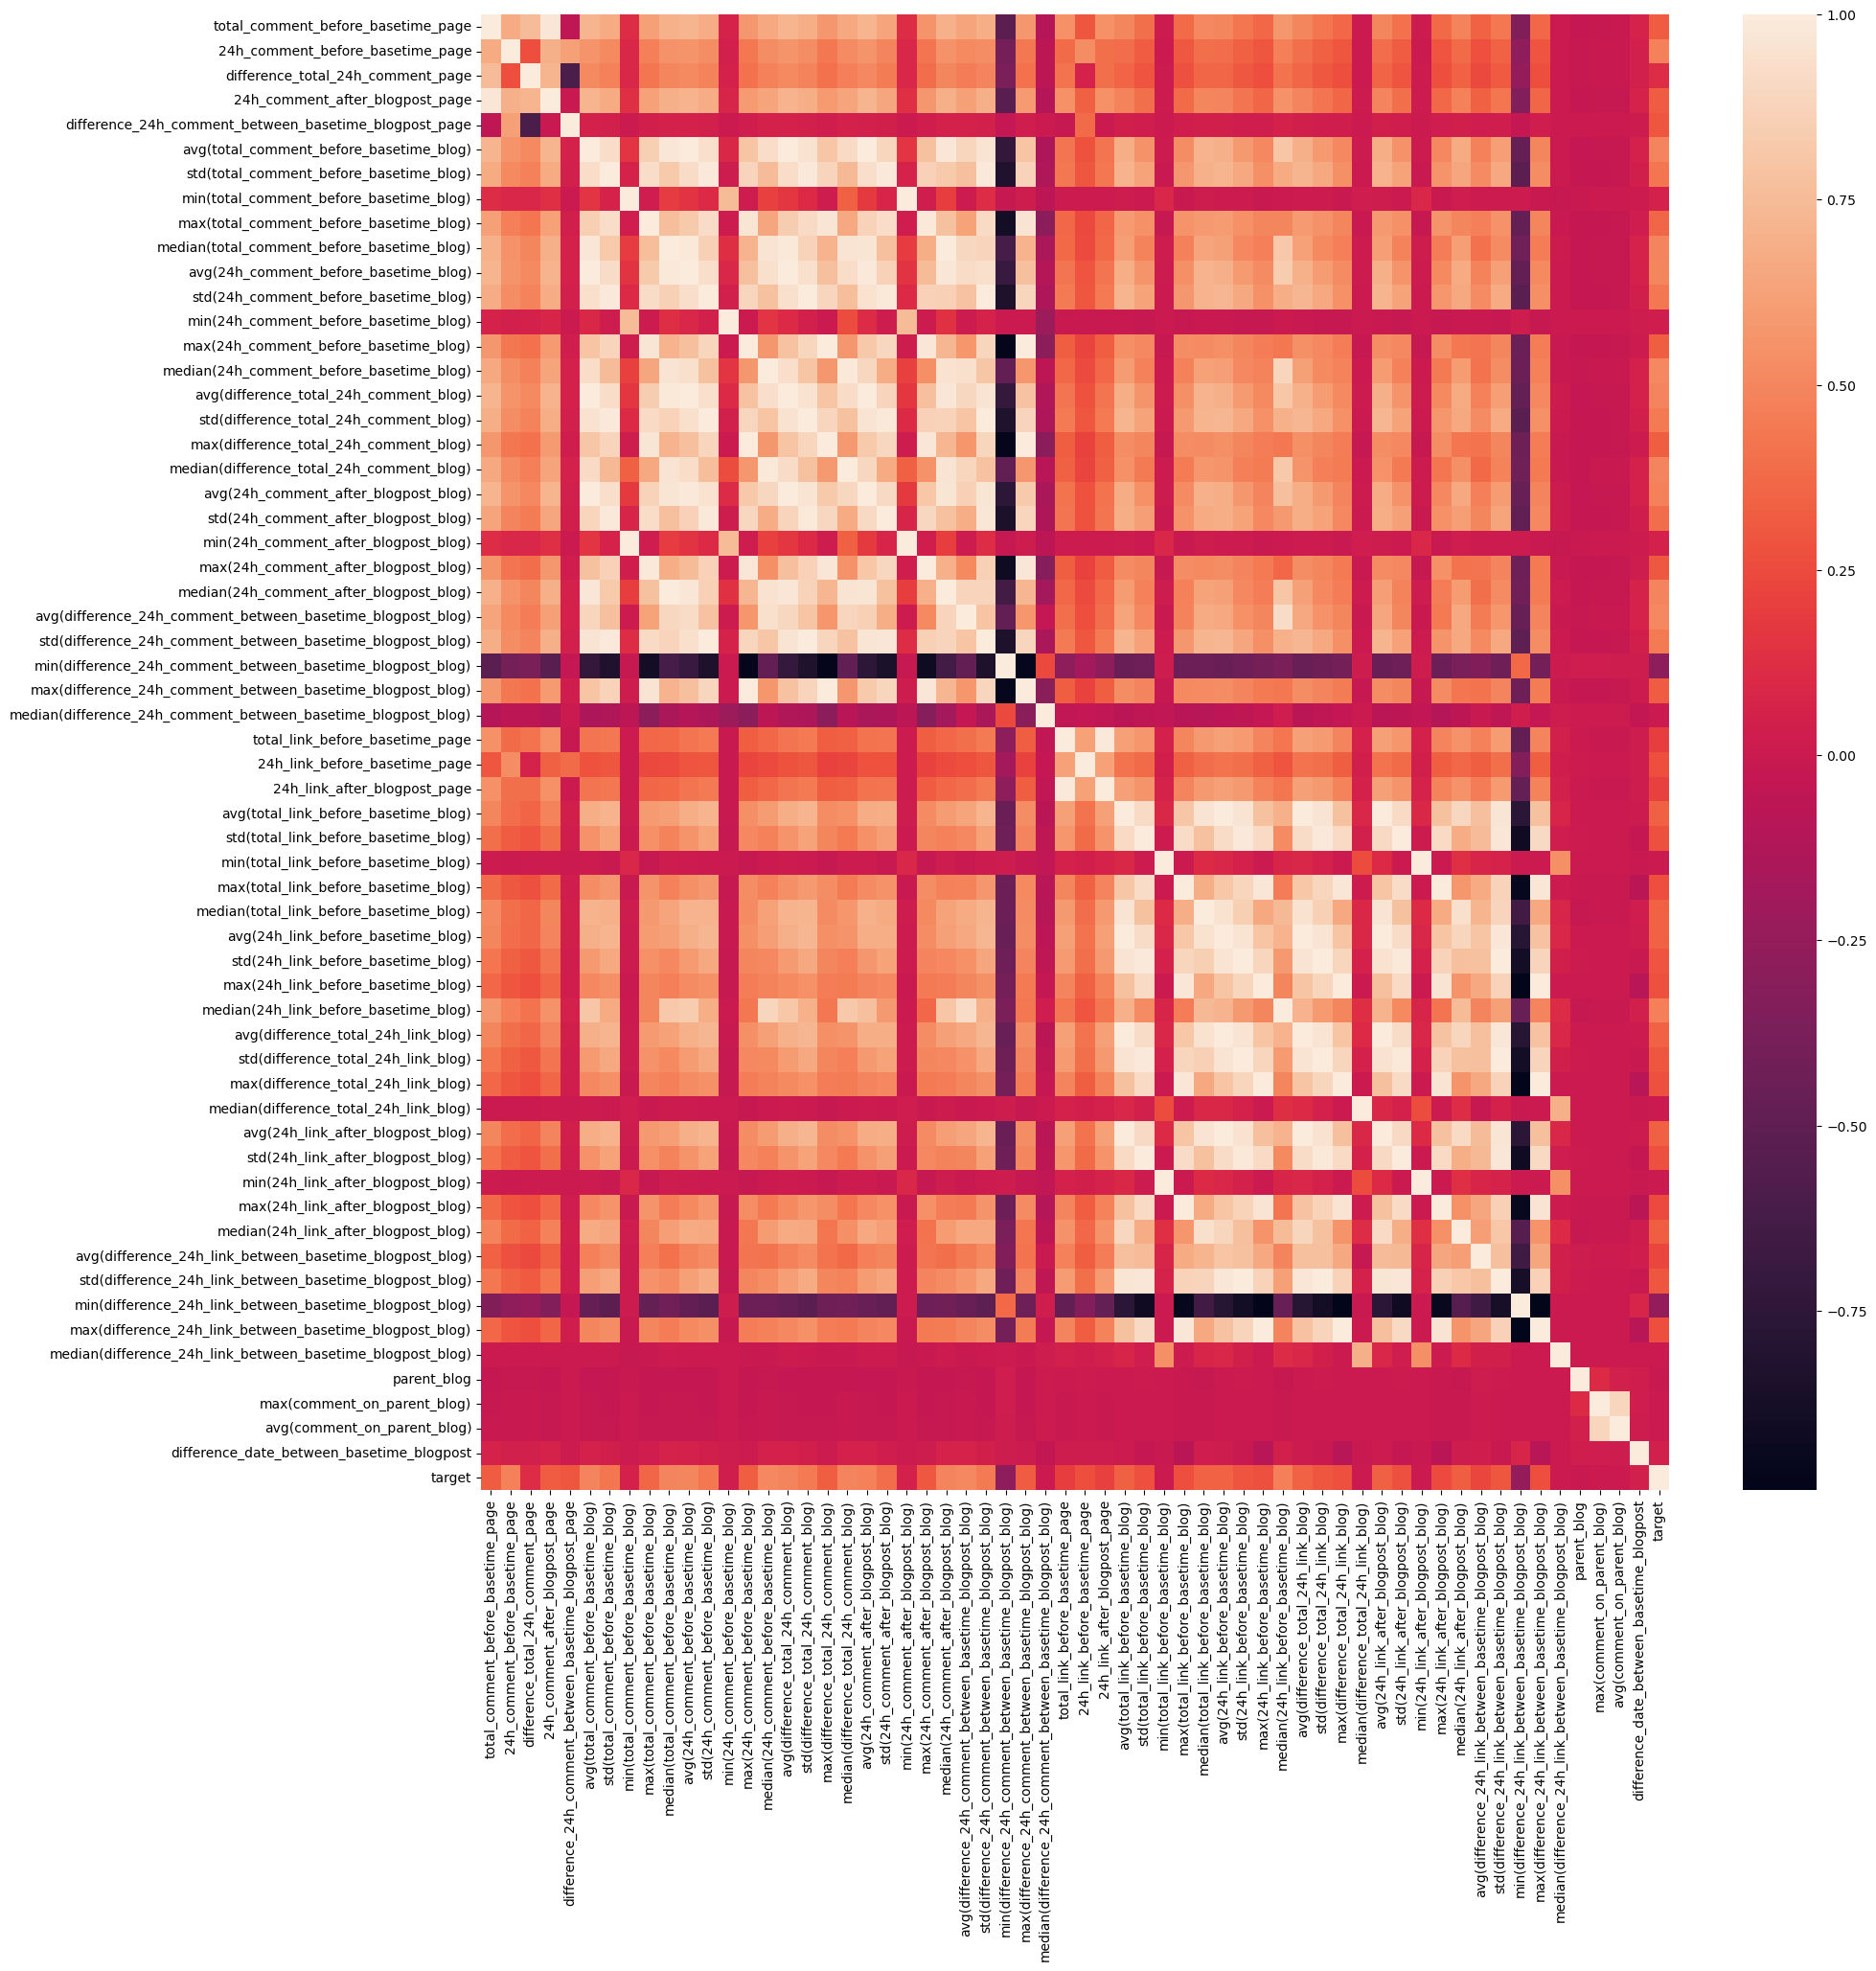

In [61]:
# Correlation Analysis
# Check the correlation among independent variables:

# The target value is not affected by the date difference between the parent blog data and blog post basetime.
# The target value is not influenced by the 'min' value.
# The target value is influenced by numeric_column_list[1:4], but not by difference_total_24h_comment_page. This indicates that past comment counts have a greater impact on the target variable than the differences.
# In summary, if there were many comments or links in the past, the probability of having many in the future increases.

df_corr = df_train.loc[:,numeric_column_list].corr() #only numberical columns 
plt.figure(figsize=(20,20))
sns.heatmap(df_corr)

In [62]:
# be cautious. 
# if correlation is too high, drop it. Test them before use them. 
index_corr_over_90 = np.where((abs(df_corr)>0.90) & (df_corr !=1))
index_corr_over_90

(array([ 0,  3,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,
         9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 13, 13, 13, 13, 13, 14, 14, 14, 14,
        14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18,
        19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 22,
        22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25,
        25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 27, 29, 31,
        32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33,
        33, 33, 33, 33, 33, 33, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36,
        36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38,
        38, 39, 39, 39, 39, 39, 39, 39, 40, 41, 41, 41, 41, 41, 41, 41, 41,
        41, 

In [63]:
# pearsonr correlation 0.05
# all of their p-values are 0
list_not_valid = []
df_final_corr = df_train.dropna()

len_corr_over_90 = len(index_corr_over_90[0])
left_columns = df_corr.columns[index_corr_over_90[0]]
right_columns = df_corr.columns[index_corr_over_90[1]]

for index in range(len_corr_over_90):
    statistic, pvalue = stats.pearsonr(df_final_corr.loc[:,left_columns[index]], df_final_corr.loc[:,right_columns[index]])
    print("%s<->%s : %f %f"%(left_columns[index],right_columns[index] , statistic, pvalue))
    if (pvalue > 0.05):
        list_not_valid.append(column_name)
print("end")
print(len(list_not_valid), " is not valids")

total_comment_before_basetime_page<->24h_comment_after_blogpost_page : 0.975145 0.000000
24h_comment_after_blogpost_page<->total_comment_before_basetime_page : 0.975145 0.000000
avg(total_comment_before_basetime_blog)<->std(total_comment_before_basetime_blog) : 0.926394 0.000000
avg(total_comment_before_basetime_blog)<->median(total_comment_before_basetime_blog) : 0.974358 0.000000
avg(total_comment_before_basetime_blog)<->avg(24h_comment_before_basetime_blog) : 0.997040 0.000000
avg(total_comment_before_basetime_blog)<->std(24h_comment_before_basetime_blog) : 0.942281 0.000000
avg(total_comment_before_basetime_blog)<->median(24h_comment_before_basetime_blog) : 0.922467 0.000000
avg(total_comment_before_basetime_blog)<->avg(difference_total_24h_comment_blog) : 0.998975 0.000000
avg(total_comment_before_basetime_blog)<->std(difference_total_24h_comment_blog) : 0.949604 0.000000
avg(total_comment_before_basetime_blog)<->median(difference_total_24h_comment_blog) : 0.913069 0.000000
avg(to

In [64]:
df_corr["target"].describe()

count    60.000000
mean      0.274807
std       0.211185
min      -0.283712
25%       0.174253
50%       0.300038
75%       0.430015
max       1.000000
Name: target, dtype: float64

In [65]:
# below are p-value over than 0.05. 
# the correlation of these columns are meaningless. 
for column_name in numeric_column_list:
    statistic, pvalue = stats.pearsonr(df_train.loc[:,column_name].fillna(0), df_train.loc[:,"target"])
    if (pvalue >=0.05) | (pvalue==np.NaN):
        print("%s %f %f"%(column_name, statistic, pvalue))

median(difference_24h_comment_between_basetime_blogpost_blog) -0.000964 0.830821
min(total_link_before_basetime_blog) -0.001304 0.772662
median(difference_total_24h_link_blog) 0.002112 0.639881
min(24h_link_after_blogpost_blog) -0.001304 0.772662
median(difference_24h_link_between_basetime_blogpost_blog) 0.002442 0.588472
parent_blog -0.006137 0.173960
max(comment_on_parent_blog) -0.002621 0.561385
avg(comment_on_parent_blog) -0.001568 0.728308


#### 2) categorical column EDA

#### Delete useless columns

In [66]:
df_train[categorical_column_list].apply(lambda x: x.nunique()).sort_values()

mon_basetime    2
word_122        2
word_123        2
word_124        2
word_125        2
               ..
word_61         2
word_62         2
word_63         2
word_65         2
word_199        2
Length: 214, dtype: int64

In [67]:
df_train[categorical_column_list]

,mon_basetime,tue_basetime,wed_basetime,thur_basetime,fri_basetime,sat_basetime,sun_basetime,mon_blogpost,tue_blogpost,wed_blogpost,...,word_190,word_191,word_192,word_193,word_194,word_195,word_196,word_197,word_198,word_199
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49083,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49084,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49085,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49086,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
df_train[categorical_column_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49088 entries, 0 to 49087
Columns: 214 entries, mon_basetime to word_199
dtypes: float64(214)
memory usage: 80.1 MB


In [70]:
# casting categorical data as int 
dict_cast = {}
for name in categorical_column_list:
    dict_cast[name] = int
df_train = df_train.astype(dict_cast)

In [71]:
df_train[categorical_column_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49088 entries, 0 to 49087
Columns: 214 entries, mon_basetime to word_199
dtypes: int64(214)
memory usage: 80.1 MB


### ANOVA
- Verify the differences in numeric data distribution by category. For example, analyze the height distribution based on gender.
- Assumptions: normality, homoscedasticity, independence (if these are not satisfied, the test results may not be reliable).
- In this exercise, verify the relationship between the distribution of the target_column and categorical data.
- If the p-value is less than or equal to 0.05, reject the null hypothesis (the p-value threshold can vary, but 0.05 is commonly used).

#### Normality Test
- For variance analysis, the data must satisfy normality.
- Test for normality using various methods: QQ plot, Shapiro-Wilk test.

((array([-4.18720716, -3.9812637 , -3.86897756, ...,  3.86897756,
          3.9812637 ,  4.18720716]),
  array([   0.,    0.,    0., ..., 1062., 1370., 1424.])),
 (15.601933971852775, 6.969666720990868, 0.402532704267029))

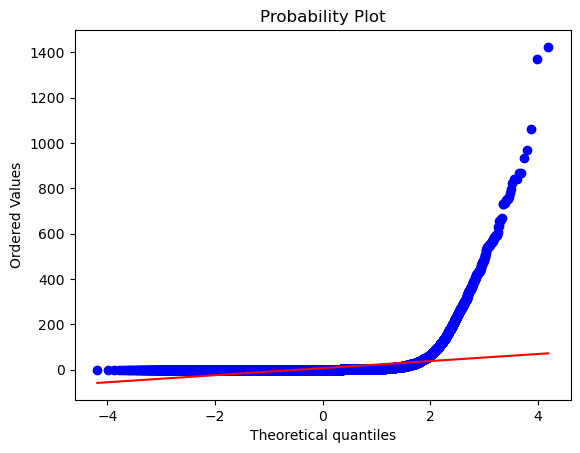

In [72]:
stats.probplot(df_train["target"], dist=stats.norm, plot=plt)

Data Does Not Satisfy Normality
- Since normality is not satisfied, there is no need to test for homoscedasticity (homoscedasticity assumes normality).
- Numeric data cannot be tested using one-way ANOVA.

Kruskal-Wallis Test (Non-parametric Test)
- As a non-parametric test, it does not require normality or homoscedasticity.
- However, as a non-parametric test, the reliability of the test results is lower compared to parametric tests.

In [73]:
# kruskall test
list_meaningful_column_by_kruskall = []

for column_name in categorical_column_list:
  list_by_value = []
  for value in df_train[column_name].dropna().unique():
      df_tmp = df_train[df_train[column_name] == value]["target"].dropna()
      list_by_value.append(np.array(df_tmp))
  statistic, pvalue = kruskal(*list_by_value)
  if pvalue <= 0.05:
    list_meaningful_column_by_kruskall.append(column_name)
  print(column_name, ", ",statistic,", ", pvalue)
print("all categorical columns : ", len(categorical_column_list))
print("selected columns by kruskal : ", len(list_meaningful_column_by_kruskall), list_meaningful_column_by_kruskall)

mon_basetime ,  6.718939644065782 ,  0.009539432662480017
tue_basetime ,  53.05958421584662 ,  3.235822725886926e-13
wed_basetime ,  25.314193674255012 ,  4.87111100195147e-07
thur_basetime ,  2.9951814265711474 ,  0.08351255798549591
fri_basetime ,  9.320698856155104 ,  0.002265795580632375
sat_basetime ,  70.1230439483758 ,  5.571825580143201e-17
sun_basetime ,  14.97113215746376 ,  0.00010916854039074796
mon_blogpost ,  0.7588318124339017 ,  0.38369435135877217
tue_blogpost ,  0.6479573671995831 ,  0.42084392206305743
wed_blogpost ,  21.12576067598529 ,  4.301071850678233e-06
thur_blogpost ,  7.1228161152811325 ,  0.007610906437847136
fri_blogpost ,  45.921170852066716 ,  1.2310832322121258e-11
sat_blogpost ,  6.405389608494141 ,  0.011377445749395164
sun_blogpost ,  14.733613584471383 ,  0.00012381898975587823
word_0 ,  4.501787692915606 ,  0.03385943773400056
word_1 ,  210.02392104495883 ,  1.3572095694917838e-47
word_2 ,  2.137098559803486 ,  0.14377358791215603
word_3 ,  0.24339

#### Insight from Kruskall Test
- Out of 214 categorical data columns, 130 have significant relationships (as determined by the Kruskal-Wallis test).
- Columns that are not significant can be removed, allowing for more focused ML analysis.

## 3. Data processing 2

### 3-1 Missing Values
    column 1 : std(24h_link_after_blogpost_blog) 124
    column 2 : min(comment_on_parent_blog)       22552
    column 2 is deleted above

In [75]:
df_train["std(24h_link_after_blogpost_blog)"].describe()

count    48964.000000
mean         0.723443
std          0.928940
min          0.000000
25%          0.000000
50%          0.321003
75%          1.032096
max          4.957952
Name: std(24h_link_after_blogpost_blog), dtype: float64

In [76]:
df_train["std(24h_link_after_blogpost_blog)"] = df_train["std(24h_link_after_blogpost_blog)"].fillna(df_train["std(24h_link_after_blogpost_blog)"].median())

In [77]:
df_train.isna().sum().sort_values(ascending=False)

total_comment_before_basetime_page    0
word_107                              0
word_113                              0
word_112                              0
word_111                              0
                                     ..
word_24                               0
word_25                               0
word_26                               0
word_27                               0
target                                0
Length: 274, dtype: int64

### 3-2 Data Validation

#### 3-2 1) Data correction

In [78]:
list_error_column = ~(df_train["difference_total_24h_comment_page"] == (df_train["total_comment_before_basetime_page"] - df_train["24h_comment_before_basetime_page"]))
df_train[list_error_column]

,total_comment_before_basetime_page,24h_comment_before_basetime_page,difference_total_24h_comment_page,24h_comment_after_blogpost_page,difference_24h_comment_between_basetime_blogpost_page,avg(total_comment_before_basetime_blog),std(total_comment_before_basetime_blog),min(total_comment_before_basetime_blog),max(total_comment_before_basetime_blog),median(total_comment_before_basetime_blog),...,word_191,word_192,word_193,word_194,word_195,word_196,word_197,word_198,word_199,target
4,6.0,0.0,2.0,5.0,-2.0,40.304670,53.845657,0.0,401.0,15.0,...,0,0,0,0,0,0,0,0,0,0.0
5,6.0,0.0,2.0,5.0,-2.0,40.304670,53.845657,0.0,401.0,15.0,...,0,0,0,0,0,0,0,0,0,0.0
6,30.0,27.0,1.0,2.0,26.0,40.304670,53.845657,0.0,401.0,15.0,...,0,0,0,0,0,0,0,0,0,9.0
17,35.0,3.0,2.0,32.0,1.0,40.304670,53.845657,0.0,401.0,15.0,...,0,0,0,0,0,0,0,0,0,1.0
18,65.0,1.0,13.0,64.0,-12.0,40.304670,53.845657,0.0,401.0,15.0,...,0,0,0,0,0,0,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49072,3.0,0.0,2.0,3.0,-2.0,2.333333,0.942809,1.0,3.0,3.0,...,0,0,0,0,0,0,0,0,0,1.0
49076,1.0,0.0,0.0,1.0,0.0,1.666667,0.942809,1.0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0.0
49078,1.0,0.0,0.0,1.0,0.0,1.666667,0.942809,1.0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0.0
49081,3.0,0.0,0.0,3.0,0.0,1.666667,0.942809,1.0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0.0


In [79]:
df_train["difference_total_24h_comment_page"] = (df_train["total_comment_before_basetime_page"] - df_train["24h_comment_before_basetime_page"])

In [80]:
df_train[~(df_train["difference_total_24h_comment_page"] == (df_train["total_comment_before_basetime_page"] - df_train["24h_comment_before_basetime_page"]))]

,total_comment_before_basetime_page,24h_comment_before_basetime_page,difference_total_24h_comment_page,24h_comment_after_blogpost_page,difference_24h_comment_between_basetime_blogpost_page,avg(total_comment_before_basetime_blog),std(total_comment_before_basetime_blog),min(total_comment_before_basetime_blog),max(total_comment_before_basetime_blog),median(total_comment_before_basetime_blog),...,word_191,word_192,word_193,word_194,word_195,word_196,word_197,word_198,word_199,target


### 3-3 Feature Selection

In [81]:
df_train = df_train[numeric_column_list + list_meaningful_column_by_kruskall]
df_test = df_test[numeric_column_list + list_meaningful_column_by_kruskall]

### 3-3 Feature Transformation

##### Standardization

In [82]:
y_train = df_train["target"]
y_train.head(5)

0     1.0
1     0.0
2     1.0
3    27.0
4     0.0
Name: target, dtype: float64

In [83]:
numeric_column_list.remove("target")

In [84]:
numeric_scaler = StandardScaler() 
numeric_scaler.fit(df_train[numeric_column_list]) 

StandardScaler()

In [85]:
x_train_numeric = numeric_scaler.transform(df_train[numeric_column_list]) 
print(x_train_numeric.shape)#numberical

(49088, 59)


In [86]:
# casting categorical data as int 
dict_cast = {}
for name in list_meaningful_column_by_kruskall:
    dict_cast[name] = int
df_train = df_train.astype(dict_cast)
df_train

,total_comment_before_basetime_page,24h_comment_before_basetime_page,difference_total_24h_comment_page,24h_comment_after_blogpost_page,difference_24h_comment_between_basetime_blogpost_page,avg(total_comment_before_basetime_blog),std(total_comment_before_basetime_blog),min(total_comment_before_basetime_blog),max(total_comment_before_basetime_blog),median(total_comment_before_basetime_blog),...,word_183,word_184,word_185,word_188,word_191,word_192,word_194,word_196,word_197,word_198
0,2.0,2.0,0.0,2.0,2.0,40.30467,53.845657,0.0,401.0,15.0,...,0,0,0,0,0,0,0,0,0,0
1,6.0,2.0,4.0,5.0,-2.0,40.30467,53.845657,0.0,401.0,15.0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,2.0,0.0,2.0,2.0,40.30467,53.845657,0.0,401.0,15.0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1.0,2.0,2.0,-1.0,40.30467,53.845657,0.0,401.0,15.0,...,0,0,0,0,0,0,0,0,0,0
4,6.0,0.0,6.0,5.0,-2.0,40.30467,53.845657,0.0,401.0,15.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49083,33.0,0.0,33.0,33.0,-33.0,33.00000,0.000000,33.0,33.0,33.0,...,1,0,0,0,0,0,0,0,0,0
49084,33.0,0.0,33.0,33.0,0.0,33.00000,0.000000,33.0,33.0,33.0,...,1,0,0,0,0,0,0,0,0,0
49085,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
49086,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
x_train_categorical = np.array(df_train[list_meaningful_column_by_kruskall])
print(x_train_categorical.shape)

(49088, 130)


In [88]:
x_train = np.concatenate((x_train_numeric, x_train_categorical), axis=1)
print(x_train.shape)

(49088, 189)


In [89]:
# test data 
df_test["difference_total_24h_comment_page"] = (df_test["total_comment_before_basetime_page"] - df_test["24h_comment_before_basetime_page"])
x_test_numeric = numeric_scaler.transform(df_test[numeric_column_list])

# casting categorical data as int 
dict_cast = {}
for name in list_meaningful_column_by_kruskall:
    dict_cast[name] = int
df_test = df_test.astype(dict_cast)
df_test

x_test_categorical = np.array(df_test[list_meaningful_column_by_kruskall])

x_test = np.concatenate((x_test_numeric, x_test_categorical), axis=1)
print(x_test.shape)
y_test = df_test["target"]

(6834, 189)


### 3-4 PCA

In [90]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators 

In [91]:
# 2D
pca = PCA(n_components=2)
X_pca_two_dimension = pca.fit_transform(x_train)
print("2D Explained_variance ratio: ",sum(pca.explained_variance_ratio_))

# 3D
pca = PCA(n_components=3)
X_pca_three_dimension = pca.fit_transform(x_train)
print("3D Explained_variance ratio: ",sum(pca.explained_variance_ratio_))

2D Explained_variance ratio:  0.5429366793870949
3D Explained_variance ratio:  0.5909772063667084


In [92]:
list_pca_explained_ratio = []

for i in [2,20,30,40,50,60,70,80,90]:
    pca_tmp = PCA(n_components=i)
    pca_tmp.fit(x_train)
    list_pca_explained_ratio.append(sum(pca_tmp.explained_variance_ratio_))

In [93]:
list_pca_explained_ratio

[0.5429366793870936,
 0.8930968043712347,
 0.9188153523117403,
 0.937906356995273,
 0.9540487101014434,
 0.9673489938058129,
 0.9772802802213969,
 0.984211766430812,
 0.9892241264750152]

In [94]:
list_pca_explained_ratio[4] # 50 components

0.9540487101014434

In [95]:
pca = PCA(n_components=50)
pca.fit(x_train) # 트레인만 fit
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)


# 4. Model Analysis
1.   base model with feature selection and no PCA
2.   Optimization with RandomForest Gridsearch and feature selection and no PCA
3.   Optimization with RandomForest Gridsearch and feature selection and PCA



In [96]:
cv = 3
n_jobs = -1

### 4-1. Base Model Learning

In [97]:
regr = RandomForestRegressor(max_depth=3, random_state=random_state)
regr.fit(x_train, y_train)
y_prd = regr.predict(x_test)
rmse = mean_squared_error(y_test, y_prd)**0.5

In [98]:
rmse

24.76176403505428

### 4-2. Optimization 1 : RandomForest with Featue Selectio nand No PCA

In [100]:
from sklearn.model_selection import GridSearchCV

hyper_params = {'n_estimators' : [10, 15, 20],
                'max_depth' : [4, 6, 8],
                'min_samples_leaf' : [4, 8, 10],
                'max_features' : [0.3, 0.5, 0.7]
               }

rf_regr = RandomForestRegressor(random_state = random_state, n_jobs = n_jobs)
grid_cv = GridSearchCV(rf_regr, param_grid = hyper_params, cv = cv, n_jobs = n_jobs)
grid_cv.fit(x_train, y_train)

print('best model hyper-parameter : ', grid_cv.best_params_)

/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:6

best model hyper-parameter :  {'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 8, 'n_estimators': 10}


In [101]:
y_prd=grid_cv.predict(x_test)
print("rmse : %f"%(mean_squared_error(y_test, y_prd)**0.5))

rmse : 25.622033


In [102]:
list_test_under_10 = (y_test <= 10)
list_test_over_10 = (y_test > 10)

### 4-3. Optimization 2 : RandomForest with PCA

In [112]:
rf_regr = RandomForestRegressor(random_state = 1234, n_jobs = -1)
grid_cv_opt2 = GridSearchCV(rf_regr, param_grid = hyper_params, cv = 3, n_jobs = -1)
grid_cv_opt2.fit(x_train_pca, y_train)

print('best model hyper-parameter : ', grid_cv_opt2.best_params_)

/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:6

In [ ]:
y_prd=grid_cv_opt2.predict(x_test_pca)
print("rmse : %f"%(mean_squared_error(y_test, y_prd)**0.5))

In [ ]:
y_prd=grid_cv_opt2.predict(x_test_pca[list_test_under_10.iloc[:,0]])
print("under 10' rmse : %f"%(mean_squared_error(y_test[list_test_under_10.iloc[:,0]], y_prd)**0.5))

In [ ]:
y_prd=grid_cv_opt2.predict(x_test_pca[list_test_over_10.iloc[:,0]])
print("over 10' rmse : %f"%(mean_squared_error(y_test[list_test_over_10.iloc[:,0]], y_prd)**0.5))

### 4-4. Model Analysis

In [ ]:
# reproduction
rf_regr = RandomForestRegressor(**grid_cv.best_params_)
rf_regr.fit(x_train, y_train)

In [ ]:
threshold_list = (rf_regr.feature_importances_ > 0.005) # 전부 조금 낮게 나와서...0.005로설정

##### Feature Importance


In [ ]:
fi_column = (numeric_column_list + list_meaningful_column_by_kruskall)
fi_column

In [ ]:
plt.figure(figsize=(25,13))
ax = plt.barh(np.array(fi_column)[threshold_list],rf_regr.feature_importances_[threshold_list])

In [ ]:
list_under_10 = (y_train <= 10)

In [ ]:
from sklearn.model_selection import GridSearchCV

hyper_params = {'n_estimators' : [10, 15, 20],
                'max_depth' : [4, 8],
                'min_samples_leaf' : [4, 8],
                'max_features' : [0.3, 0.5]
               }

rf_regr = RandomForestRegressor(random_state = random_state, n_jobs = n_jobs)
grid_cv = GridSearchCV(rf_regr, param_grid = hyper_params, cv = cv, n_jobs = n_jobs)
grid_cv.fit(x_train[list_under_10.iloc[:,0]], y_train[list_under_10.iloc[:,0]])

print('best model hyper-parameter : ', grid_cv.best_params_)

In [ ]:
# comment가 10이하인 경우 : 91.5%
y_prd=grid_cv.predict(x_test[list_test_under_10.iloc[:,0]])
print("rmse : %f"%(mean_squared_error(y_test[list_test_under_10.iloc[:,0]], y_prd)**0.5))
y_prd=grid_cv.predict(x_test[list_test_over_10.iloc[:,0]])
print("rmse : %f"%(mean_squared_error(y_test[list_test_over_10.iloc[:,0]], y_prd)**0.5))